In [1]:
%load_ext autoreload
%autoreload 2

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

# PLAID

In [189]:
path = Path("/data/lux70/plaid/artifacts/samples/5j007z42/100_200_300_v2")

In [190]:
df_dict = {}

for length in os.listdir(path):
    df_dict[length] = pd.read_csv(path / length / "designability.csv")

print(df_dict.keys())

dict_keys(['100', '148', '48'])


In [191]:
big_df = pd.concat(list(df_dict.values()))
big_df.shape

(384, 18)

In [192]:
summary = big_df.describe()
summary = summary.filter(['mean', 'std'], axis=0)
for col in summary.columns:
    mean = summary[col]['mean']
    std = summary[col]['std']
    print(col, f"{mean:.2f}±{std:.2f}")

Unnamed: 0 63.50±37.00
plddt 62.18±16.98
ccrmsd 7.60±7.52
scrmsd 9.06±8.12
cctm 0.72±0.27
sctm 0.69±0.24
perplexity 14.58±4.54
molecular_weight 21802.22±8963.56
aromaticity 0.09±0.03
instability_index 37.04±11.60
isoelectric_point 6.74±1.88
gravy -0.09±0.41
charge_at_pH -2.63±7.11


In [193]:
print((big_df.scrmsd < 2).sum() / len(big_df))
print((big_df.ccrmsd < 2).sum() / len(big_df))
print((big_df.sctm > 0.5).sum() / len(big_df))

0.24739583333333334
0.3958333333333333
0.703125


# ProteinGenerator

In [218]:
path = Path("/data/lux70/plaid/baselines/proteingenerator/100_200_300/")
big_df = pd.read_csv(path / "designability.csv")
print(big_df.shape)

(300, 18)


In [219]:
summary = big_df.describe()
summary

,Unnamed: 0,plddt,ccrmsd,scrmsd,cctm,sctm,perplexity,molecular_weight,aromaticity,instability_index,isoelectric_point,gravy,charge_at_pH
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,149.500000,0.841870,15.715159,3.472982,0.420356,0.862380,8.988858,21688.846412,0.037822,63.963855,5.630221,-0.159347,-11.144268
std,86.746758,0.108771,3.369976,4.676504,0.093942,0.131920,2.014334,8130.311760,0.030445,21.175184,2.096156,0.609553,10.346914
min,0.000000,0.353380,2.972114,0.469446,0.213520,0.187450,3.323046,9342.584300,0.000000,1.701000,4.169163,-1.644000,-39.067165
25%,74.750000,0.784605,13.518054,1.104983,0.345890,0.819925,7.446304,12363.445325,0.010000,46.950417,4.603626,-0.567750,-17.860590
50%,149.500000,0.857825,15.729024,1.745634,0.410530,0.911380,9.114353,22206.624200,0.035000,64.863000,4.818548,-0.163833,-10.799501
75%,224.250000,0.927249,17.989170,3.315563,0.487482,0.952647,10.251444,29340.366075,0.060000,76.489000,5.216237,0.205917,-4.953637
max,299.000000,0.992404,28.042869,37.848807,0.721220,0.984260,14.221144,36775.866100,0.130000,125.194000,11.999968,1.647333,18.782847


In [220]:
for col in summary.columns:
    mean = summary[col]['mean']
    std = summary[col]['std']
    print(col, f"{mean:.2f}±{std:.2f}")

Unnamed: 0 149.50±86.75
plddt 0.84±0.11
ccrmsd 15.72±3.37
scrmsd 3.47±4.68
cctm 0.42±0.09
sctm 0.86±0.13
perplexity 8.99±2.01
molecular_weight 21688.85±8130.31
aromaticity 0.04±0.03
instability_index 63.96±21.18
isoelectric_point 5.63±2.10
gravy -0.16±0.61
charge_at_pH -11.14±10.35


In [221]:
print((big_df.scrmsd < 2).sum() / len(big_df))
print((big_df.ccrmsd < 2).sum() / len(big_df))
print((big_df.sctm > 0.5).sum() / len(big_df))

0.54
0.0
0.9766666666666667


# Protpardelle

In [198]:
path = Path("/data/lux70/plaid/baselines/protpardelle/samples_100_200_300")
big_df = pd.read_csv(path / "designability.csv")

In [199]:
summary = big_df.describe()

for col in summary.columns:
    mean = summary[col]['mean']
    std = summary[col]['std']
    print(col, f"{mean:.2f}±{std:.2f}")

Unnamed: 0 149.50±86.75
plddt 1.00±0.00
ccrmsd 13.93±2.66
scrmsd 6.26±4.41
cctm 0.52±0.14
sctm 0.71±0.17
perplexity 10.82±1.24
molecular_weight 20517.07±8089.02
aromaticity 0.03±0.02
instability_index 27.62±10.82
isoelectric_point 4.99±0.77
gravy 0.11±0.34
charge_at_pH -10.07±6.06


In [200]:
print((big_df.scrmsd < 2).sum() / len(big_df))
print((big_df.ccrmsd < 2).sum() / len(big_df))
print((big_df.sctm > 0.5).sum() / len(big_df))

0.09
0.0
0.8366666666666667


<Axes: >

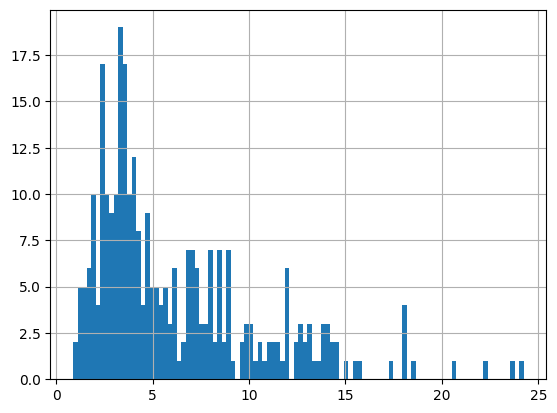

In [201]:
big_df.scrmsd.hist(bins=100)

<Axes: >

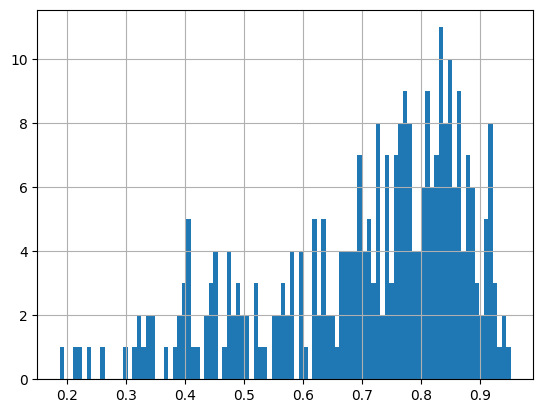

In [202]:
big_df.sctm.hist(bins=100)

# Natural Proteins

In [222]:
path = Path("/data/lux70/plaid/artifacts/natural/")

df_dict = {}

lengths = os.listdir(path)

for length in lengths:
    df_dict[length] = pd.read_csv(path / length / "designability.csv")

In [224]:
df_dict.keys()

dict_keys(['maxlen64', 'maxlen256', 'maxlen128', 'maxlen512'])

In [225]:
for length in lengths:
    print(df_dict[length].designable.sum() / len(df_dict[length]))

1.0
0.9981998199819982
1.0
1.0


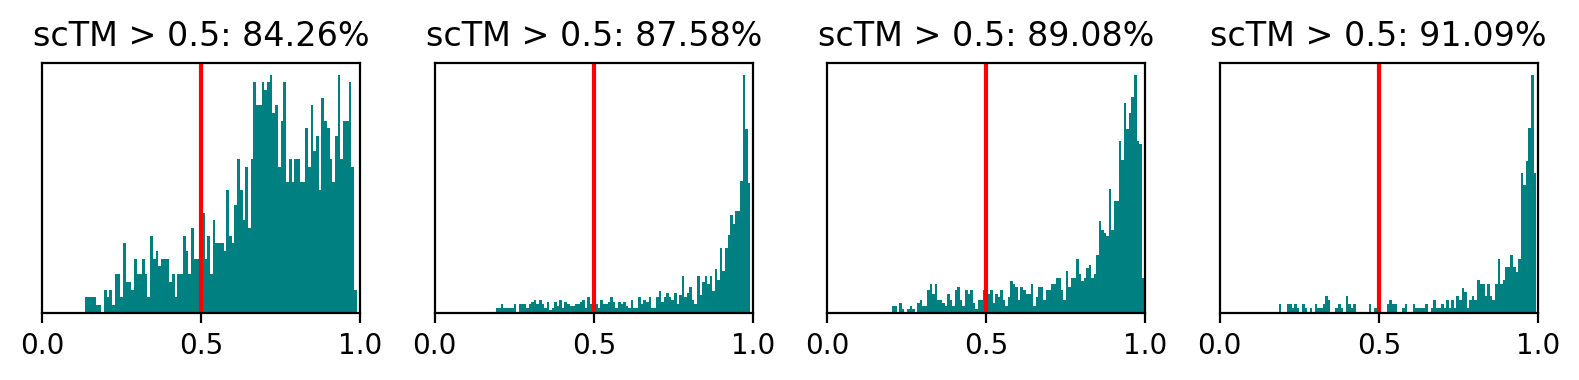

In [206]:
fig, axs = plt.subplots(1,4, figsize=(8,2), dpi=200)
for i, length in enumerate(lengths):
    axs[i].hist(df_dict[length].sctm.values, bins=100, color='teal')
    axs[i].set_title(f"{length}")
    axs[i].set_xlim(0,1)
    axs[i].axvline(x=0.5, c='red')
    axs[i].set_yticks([])
    des = (df_dict[length].sctm > 0.5).sum() / len(df_dict[length].sctm > 0.5)
    axs[i].set_title(f"scTM > 0.5: {des:.02%}")

plt.tight_layout()
plt.show()

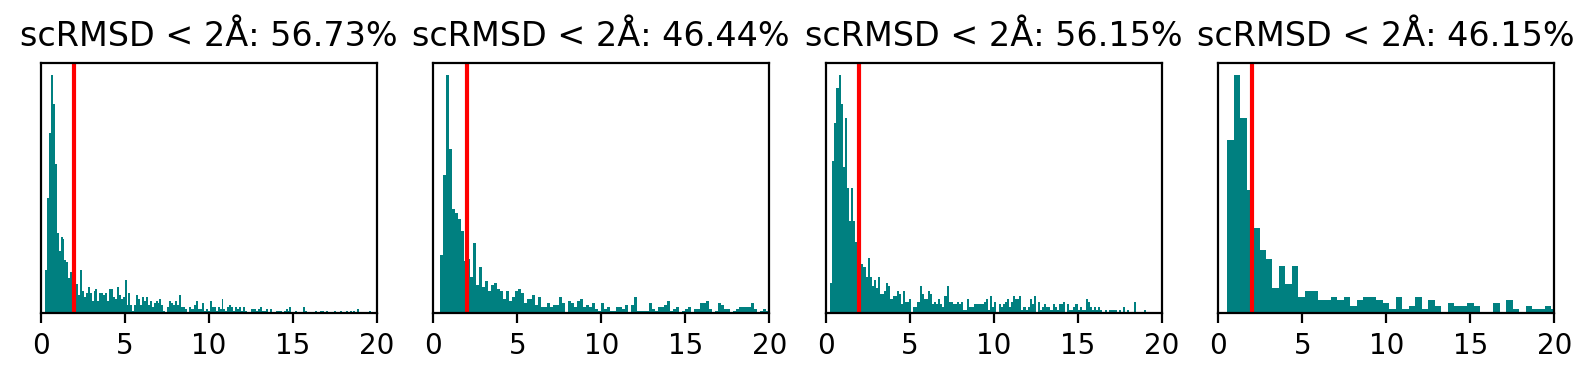

In [207]:
fig, axs = plt.subplots(1,4, figsize=(8,2), dpi=200)
for i, length in enumerate(lengths):
    axs[i].hist(df_dict[length].scrmsd.values, bins=300, color='teal')
    axs[i].set_title(f"{length}")
    axs[i].set_xlim(0,20)
    axs[i].axvline(x=2, c='red')
    axs[i].set_yticks([])
    des = (df_dict[length].scrmsd < 2).sum() / len(df_dict[length].scrmsd < 2)
    axs[i].set_title(f"scRMSD < 2Å: {des:.02%}")
plt.tight_layout()

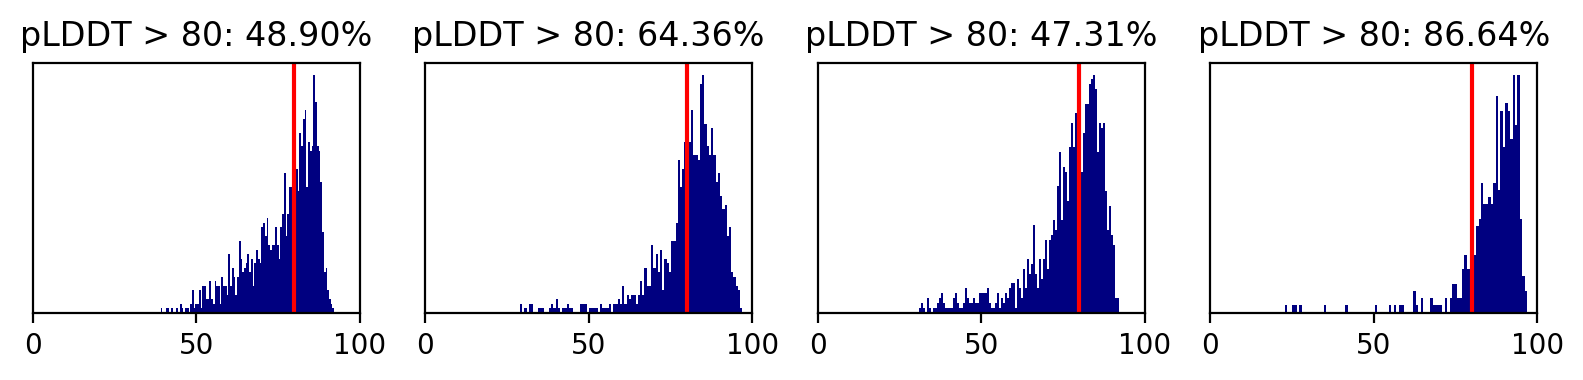

In [208]:
fig, axs = plt.subplots(1,4, figsize=(8,2), dpi=200)
for i, length in enumerate(lengths):
    axs[i].hist(df_dict[length].plddt.values, bins=100, color='navy')
    axs[i].set_xlim(0,100)
    axs[i].axvline(x=80, c='red')
    axs[i].set_yticks([])
    des = (df_dict[length].plddt > 80).sum() / len(df_dict[length])
    axs[i].set_title(f"pLDDT > 80: {des:.02%}")
plt.tight_layout()
plt.show()

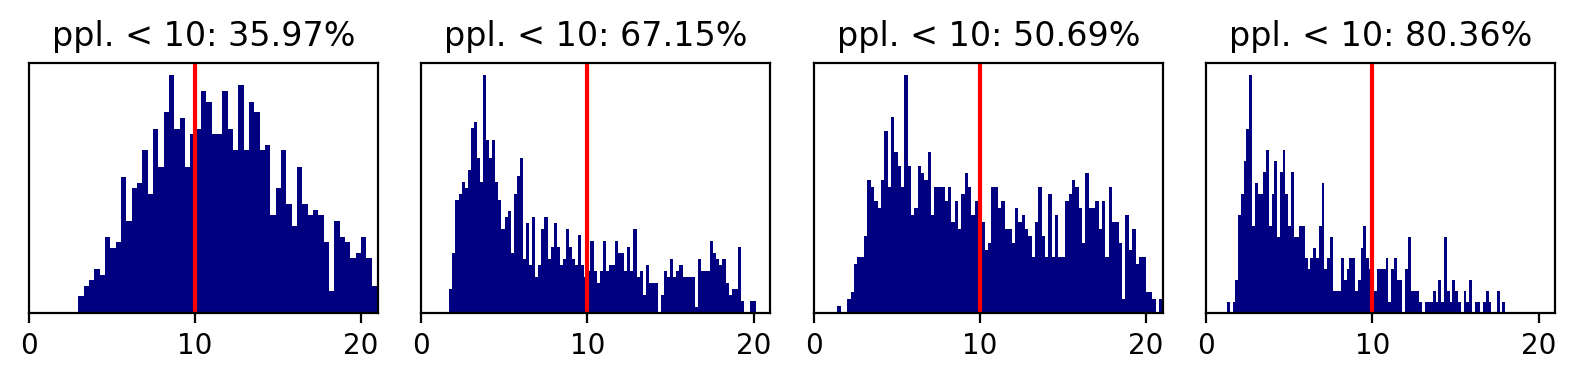

In [209]:
fig, axs = plt.subplots(1,4, figsize=(8,2), dpi=200)
for i, length in enumerate(lengths):
    axs[i].hist(df_dict[length].perplexity.values, bins=100, color='navy')
    axs[i].set_xlim(0,21)
    axs[i].axvline(x=10, c='red')
    axs[i].set_yticks([])
    des = (df_dict[length].perplexity <10).sum() / len(df_dict[length])
    axs[i].set_title(f"ppl. < 10: {des:.02%}")
plt.tight_layout()
plt.show()

In [210]:
for i, length in enumerate(lengths):
    print((df_dict[length].scrmsd > 2).sum() / len(df_dict[length]))

0.4326996197718631
0.5355535553555355
0.43846153846153846
0.5384615384615384


In [226]:
big_df = pd.concat(list(df_dict.values()))

Text(0.5, 1.0, 'Length distribution')

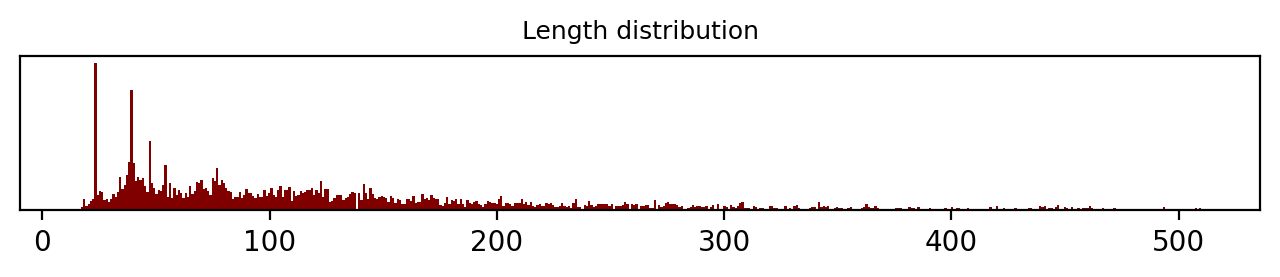

In [227]:
fig, ax = plt.subplots(1,1,figsize=(8,1),dpi=200)
_ = plt.hist(big_df.sequences.str.len(), bins=500,color="maroon")
plt.yticks([])
plt.title("Length distribution",fontsize=9)

In [228]:
import numpy as np
print(np.mean(big_df.ccrmsd.values), np.std(big_df.ccrmsd.values))

0.013497887242104071 0.14731438419913928


In [229]:
big_df.describe()

,Unnamed: 0,plddt,ccrmsd,scrmsd,cctm,sctm,perplexity,molecular_weight,aromaticity,instability_index,isoelectric_point,gravy,charge_at_pH
count,4220.000000,4220.000000,4.220000e+03,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000,4220.000000
mean,579.782227,78.889005,1.349789e-02,4.432093,0.999664,0.783604,9.865747,14172.426968,0.084651,38.079327,6.959271,-0.184684,-1.136821
std,366.470662,11.001894,1.473318e-01,6.171212,0.005765,0.204115,5.027404,10958.734299,0.037552,16.755585,1.976096,0.460696,5.730593
min,0.000000,22.856881,6.584438e-16,0.251305,0.721970,0.134410,1.240745,1422.496100,0.000000,-18.421212,4.050028,-2.109524,-34.655971
25%,263.000000,74.349964,3.760774e-15,0.910211,1.000000,0.676657,5.529786,5769.348450,0.057692,27.607228,5.179121,-0.452056,-3.963249
50%,538.000000,81.624059,5.954133e-15,1.826484,1.000000,0.861050,9.303823,11231.416350,0.082278,36.346528,6.474382,-0.204668,-0.588467
75%,890.000000,86.262404,4.673924e-14,5.366524,1.000000,0.947477,13.725045,18617.782925,0.106802,46.402206,8.860567,0.044637,2.062042
max,1314.000000,96.962145,6.595819e+00,116.396061,1.000000,0.995960,35.084185,57047.234000,0.269231,184.480000,11.999968,1.571429,27.420586


In [215]:
summary = big_df.describe()
summary = summary.filter(['mean', 'std'], axis=0)
for col in summary.columns:
    mean = summary[col]['mean']
    std = summary[col]['std']
    print(col, f"{mean:.2f}±{std:.2f}")

Unnamed: 0 579.78±366.47
plddt 78.89±11.00
ccrmsd 0.01±0.15
scrmsd 4.43±6.17
cctm 1.00±0.01
sctm 0.78±0.20
perplexity 9.87±5.03
molecular_weight 14172.43±10958.73
aromaticity 0.08±0.04
instability_index 38.08±16.76
isoelectric_point 6.96±1.98
gravy -0.18±0.46
charge_at_pH -1.14±5.73


In [216]:
print((big_df.scrmsd < 2).sum() / len(big_df))
print((big_df.ccrmsd < 2).sum() / len(big_df))
print((big_df.sctm > 0.5).sum() / len(big_df))

0.5260663507109005
0.999526066350711
0.874170616113744


# Diversity and Novelty

In [248]:
import glob
paths = glob.glob("/homefs/home/robins21/fold_seek_results_/scoring/5j007z42_100_200_300_v2_*novelty*.csv")

In [252]:
paths

['/homefs/home/robins21/fold_seek_results_/scoring/5j007z42_100_200_300_v2_48_novelty_score.csv',
 '/homefs/home/robins21/fold_seek_results_/scoring/5j007z42_100_200_300_v2_filtered_48_novelty_score.csv',
 '/homefs/home/robins21/fold_seek_results_/scoring/5j007z42_100_200_300_v2_filtered_100_novelty_score.csv',
 '/homefs/home/robins21/fold_seek_results_/scoring/5j007z42_100_200_300_v2_100_novelty_score.csv',
 '/homefs/home/robins21/fold_seek_results_/scoring/5j007z42_100_200_300_v2_148_novelty_score.csv',
 '/homefs/home/robins21/fold_seek_results_/scoring/5j007z42_100_200_300_v2_filtered_148_novelty_score.csv']

In [251]:
all_dfs = {}
for p in paths:
    all_dfs[Path(p).stem] = pd.read_csv(p)

In [253]:
!ls /data/lux70/plaid/artifacts/samples/by_length

100  120  140  160  180  200  220  240	32  52	72  92		sample.yaml
104  124  144  164  184  204  224  244	36  56	76  96		tmp
108  128  148  168  188  208  228  248	40  60	80  generated
112  132  152  172  192  212  232  252	44  64	84  latent.npz
116  136  156  176  196  216  236  256	48  68	88  sample.log
